In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import math
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils as utils

# MLP Implementation

## Train the model

In [22]:
MNIST_train_mlp = datasets.MNIST(root="./dataset/", transform=transforms.ToTensor(), train=True)
MNIST_test_mlp = datasets.MNIST(root="./dataset/", transform=transforms.ToTensor(), train=False) 

MNIST_train_mlp = utils.data.Subset(MNIST_train_mlp, range(6000))
MNIST_test_mlp = utils.data.Subset(MNIST_test_mlp, range(6000))
MNIST_trainloader_mlp = utils.data.DataLoader(MNIST_train_mlp, batch_size=100, shuffle=True, num_workers=4)
MNIST_testloader_mlp = utils.data.DataLoader(MNIST_test_mlp, batch_size=100, shuffle=True, num_workers=4)

mlp_architec = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(784, 512), nn.ReLU(),
                    nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(),
                    nn.Linear(512, 10)
                )

mlp_net = NN()
mlp_net.update_param(archi=mlp_architec)
mlp_trl, mlp_tra, mlp_tl, mlp_ta = mlp_net.model(MNIST_trainloader_mlp, MNIST_testloader_mlp, num_epoch=15)

## Show results

Text(0, 0.5, 'traning loss')

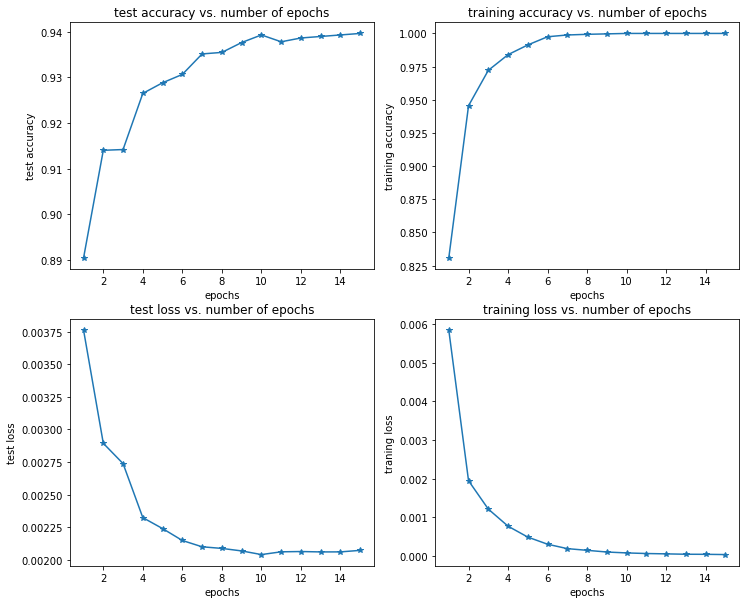

In [23]:
_, [(a1,a2),(a3,a4)] = plt.subplots(2,2, figsize=(12,10))
a1.plot(epoch_15, mlp_ta, '*-')
a1.set_title("test accuracy vs. number of epochs")
a1.set_xlabel("epochs")
a1.set_ylabel("test accuracy")

a2.plot(epoch_15, mlp_tra, '*-')
a2.set_title("training accuracy vs. number of epochs")
a2.set_xlabel("epochs")
a2.set_ylabel("training accuracy")

a3.plot(epoch_15, mlp_tl, '*-')
a3.set_title("test loss vs. number of epochs")
a3.set_xlabel("epochs")
a3.set_ylabel("test loss")

a4.plot(epoch_15, mlp_trl, '*-')
a4.set_title("training loss vs. number of epochs")
a4.set_xlabel("epochs")
a4.set_ylabel("traning loss")

## Compare the accuracies of the MLP and VGG11

VGG11 works better for MNIST classification, since it has a smaller test loss, which decreases motonically after the second epoch, and a higher test accuracy overall. 


## Add another layer in the MLP and train on the MNIST dataset again

In [24]:
layer = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512), nn.ReLU(),
    nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(),
    nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(),
    nn.Linear(512, 10)
)

layer_mlp = NN()
layer_mlp.update_param(archi=layer)
_, layer_tra, _, layer_ta = layer_mlp.model(MNIST_trainloader_mlp, MNIST_testloader_mlp, num_epoch=15)

Text(0, 0.5, 'training accuracy')

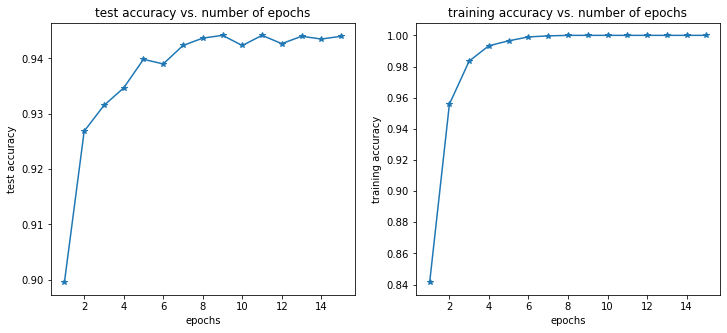

In [25]:
_, (a1,a2) = plt.subplots(1,2, figsize=(12,5))
a1.plot(epoch_15, layer_ta, '*-')
a1.set_title("test accuracy vs. number of epochs")
a1.set_xlabel("epochs")
a1.set_ylabel("test accuracy")

a2.plot(epoch_15, layer_tra, '*-')
a2.set_title("training accuracy vs. number of epochs")
a2.set_xlabel("epochs")
a2.set_ylabel("training accuracy")

Adding a new layer is similar to the original one, though its test accuracy is slightly higher than the original when epoch is small. This NN is better since it is more complex by adding a new layer to the network.